<a href="https://colab.research.google.com/github/Allen9809/Bank-Churn-Prediction-Classsification/blob/master/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install -q opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset_url = 'https://www.kaggle.com/santoshd3/bank-customers'
od.download(dataset_url)
df = pd.read_csv('/content/bank-customers/Churn Modeling.csv')
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: allenqqqq
Your Kaggle Key: ··········


100%|██████████| 262k/262k [00:00<00:00, 48.8MB/s]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# # boxplot for numerical feature
# _,axss = plt.subplots(2,3, figsize=[20,10])
# sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axss[0][0])
# sns.boxplot(x='Exited', y ='Age', data=df, ax=axss[0][1])
# sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axss[0][2])
# sns.boxplot(x='Exited', y ='NumOfProducts', data=df, ax=axss[1][0])
# sns.boxplot(x='Exited', y ='Balance', data=df, ax=axss[1][1])
# sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axss[1][2])

In [ ]:
# # understand categorical feature
# # 'Geography', 'Gender'
# # 'HasCrCard', 'IsActiveMember'
# _,axss = plt.subplots(2,2, figsize=[20,10])
# sns.countplot(x='Exited', hue='Geography', data=df, ax=axss[0][0])
# sns.countplot(x='Exited', hue='Gender', data=df, ax=axss[0][1])
# sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axss[1][0])
# sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axss[1][1])

In [ ]:
y = df['Exited']

In [ ]:
X = df.drop(['RowNumber','CustomerId','Surname','Exited'], axis=1)

In [ ]:
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
X = pd.get_dummies(X, columns=cat_cols)

In [ ]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 13 features
test data has 2500 observation with 13 features


# Method 1: Select the Baseline Model, Fine-tune the Selected Model, then Evaluate it

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Add XGBoost to the models dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

best_recall = 0
best_model_name = None

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='recall')
    mean_recall = scores.mean()
    print(f"{model_name}: Mean Recall: {mean_recall:.2f}")

    # Check if current model has higher recall than the best model found so far
    if mean_recall > best_recall:
        best_recall = mean_recall
        best_model_name = model_name

print(f"\nBest model with highest recall: {best_model_name} (Mean Recall: {best_recall:.2f})")


Logistic Regression: Mean Recall: 0.21
Random Forest: Mean Recall: 0.47
Support Vector Machine: Mean Recall: 0.38
XGBoost: Mean Recall: 0.49

Best model with highest recall: XGBoost (Mean Recall: 0.49)


In [ ]:
from sklearn.model_selection import GridSearchCV

best_model_m1 = models[best_model_name]
param_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [1, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001]}

# Perform grid search
grid_search = GridSearchCV(best_model_m1, param_grid, cv=5, scoring='recall')
grid_search.fit(X, y)
print("Best parameters found:")
print(grid_search.best_params_)
print("Best cross-validation recall: {:.2f}".format(grid_search.best_score_))

Best parameters found:
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 80}
Best cross-validation recall: 0.49


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
best_model_m1.fit(X_train,y_train)
confusion_matrices = [("Random Forest", confusion_matrix(y_test,best_model_m1.predict(X_test)))]
draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8596
precision is: 0.7134502923976608
recall is: 0.4909456740442656



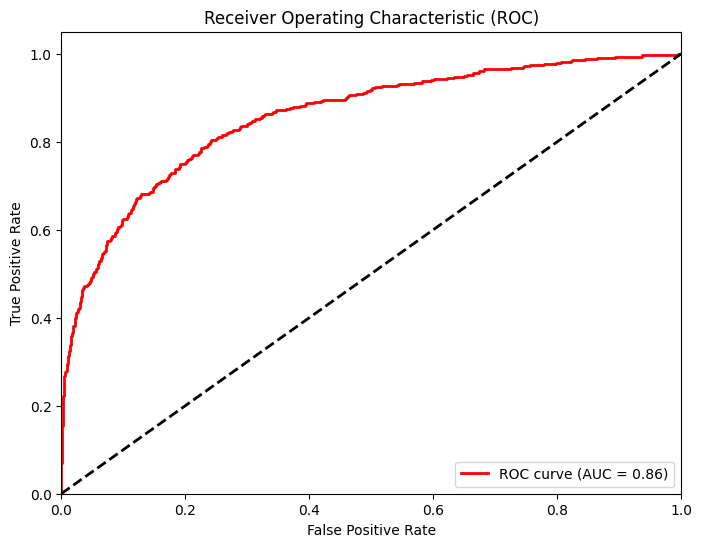

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

# Use predict_proba to get the probability results of Random Forest
y_pred_m1 = best_model_m1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_m1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Method 2: Fine-tune All Models, Select the Best One and Evaluate it

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 80, 100], 'max_depth': [1, 5, 10]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]},
    'XGBoost':{'n_estimators': [50, 80, 100],
               'max_depth': [1, 5, 10],
               'learning_rate': [0.1, 0.01, 0.001]}
}

best_models = {}

# Perform grid search for each model
for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters found for {model_name}:")
    print(grid_search.best_params_)
    print("Best cross-validation recall: {:.2f}".format(grid_search.best_score_))

    # Evaluate best model on test set
    best_model_m2 = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_pred)
    print("Test set recall: {:.2f}".format(test_recall))
    print("-------------------------------------")

    # Check if the current best model outperforms the previously stored one
    if model_name not in best_models or grid_search.best_score_ > best_models[model_name].best_score_:
        best_models[model_name] = best_model_m2
        print(f"Updated {model_name} best model")


Best parameters found for Logistic Regression:
{'C': 10}
Best cross-validation recall: 0.21
Test set recall: 0.20
-------------------------------------
Updated Logistic Regression best model
Best parameters found for Random Forest:
{'max_depth': 10, 'n_estimators': 80}
Best cross-validation recall: 0.42
Test set recall: 0.20
-------------------------------------
Updated Random Forest best model
Best parameters found for Support Vector Machine:
{'C': 10, 'gamma': 0.1}
Best cross-validation recall: 0.45
Test set recall: 0.20
-------------------------------------
Updated Support Vector Machine best model
Best parameters found for XGBoost:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation recall: 0.48
Test set recall: 0.20
-------------------------------------
Updated XGBoost best model


In [ ]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [("XGBoost", confusion_matrix(y_test,best_model_m2.predict(X_test)))]
draw_confusion_matrices(confusion_matrices)

XGBoost
Accuracy is: 0.8704
precision is: 0.7678018575851393
recall is: 0.49899396378269617



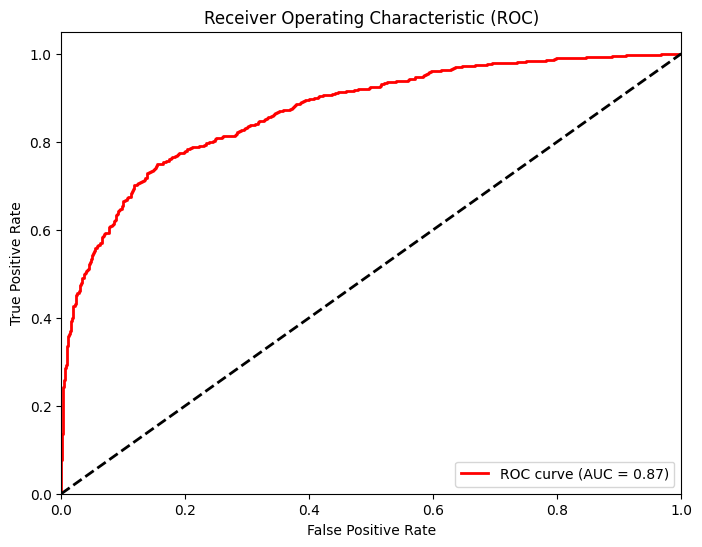

In [ ]:
# Use predict_proba to get the probability results of Random Forest
y_pred_m2 = best_model_m2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_m2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
4       NumOfProducts    0.252657
6      IsActiveMember    0.197308
1                 Age    0.165429
9   Geography_Germany    0.103230
11      Gender_Female    0.055905
3             Balance    0.048596
8    Geography_France    0.047577
10    Geography_Spain    0.030137
0         CreditScore    0.027347
2              Tenure    0.024429
5           HasCrCard    0.023950
7     EstimatedSalary    0.023436
12        Gender_Male    0.000000


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 2.3 MB/s eta 0:00:00


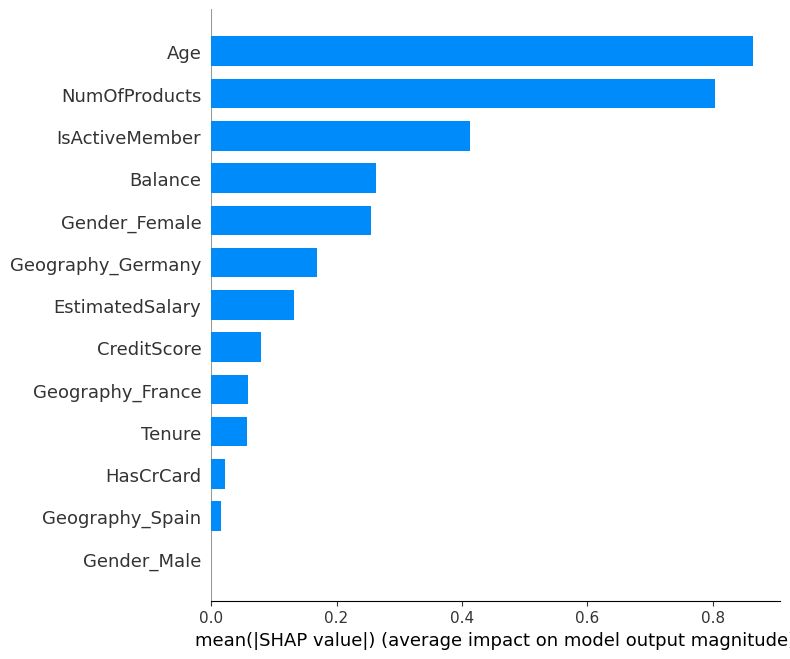

In [ ]:
import shap

# calculate SHAP value
explainer = shap.Explainer(best_model_m2)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")


In [ ]:
import pickle

# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model_m2, file)
